# Sentiment Analysis on tweeter feeds of 5 news agencies
----
## Conclusion


Sentiment analysis was performed on tweeter feeds of 5 news agencies.
'CBS'
'BBC'
'CNN'
'Fox' 
'New York times'

Data collected in csv is at [csv](docs/Tweet_sentiments.csv)

### Trend 1:

![SentimentsExpressed](docs/sentimentsexpressed_03-06-18.png)

Most of the tweets are scatter with mixed sentiments except BBC. 
It is very odd to have several tweets of BBC have same positive sentiment.
It is suspicious and seems to be work of chat bot to create positive influence on the users. 
### Trend 2:

![OverallSentiments](docs/overall_sentiments_03-06-18.png)
BBC has positive sentiment probably due to chat bot activity as mentioned earlier.
CNN news has negative sentiment in last 100 tweets.
Others have aggregate sentiment to near zero.

### Trend 3:

This sentiment analysis gives some insight of user sentiments but does not give overall picture.
1. 100 tweets are not enough to judge sentiments. Data changes at every rerun.  We need at least 6 month of data, to see complete picture.
2. Tweets can be directed to pessimistic article on new agency and does not reflect news agency performance. 



----
## Tasks completed:

The first plot will be and/or feature the following:

Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative time stamp.
The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.
As final considerations:

Use the Matplotlib and Seaborn libraries.
Include a written description of three observable trends based on the data.
Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
Include an exported markdown version of your Notebook called README.md in your GitHub repository.

---
## changelog
* 03-Mar-2018 


In [29]:
#Importing needed libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tweepy
import datetime
from matplotlib.ticker import FormatStrFormatter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import myproject_config as config
analyzer = SentimentIntensityAnalyzer()
ax = analyzer.polarity_scores

In [30]:

# Twitter API Keys
consumer_key = config.twitter_consumer_key
consumer_secret = config.twitter_consumer_secret
access_token = config.twitter_access_token
access_token_secret = config.twitter_access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [31]:
# Twitter extract function that returns List
def json_extract_to_list( json_expression):
    '''
    # Twitter extract function that returns List from json
    Example :
    json_extract_to_list("v_tweet_data['statuses'][*]['created_at']")
    this return list of  'created_at' from json
    '''
    global json_extract_to_list_x
    global json_extract_to_list_p1
    global json_extract_to_list_p2
    global json_extract_to_list_list1
    global json_extract_to_list_result1
    global json_extract_to_list_list_value
    global json_extract_to_list_counter1
    
    json_extract_to_list_x = json_expression
    json_extract_to_list_p1 = json_extract_to_list_x.split('*')[0]
    json_extract_to_list_p2 = json_extract_to_list_x.split('*')[1]
    json_extract_to_list_p1 = json_extract_to_list_p1[:len(json_extract_to_list_p1)-1]
    json_extract_to_list_p2 = json_extract_to_list_p2 [1:]
    json_extract_to_list_list1 = []
    exec('json_extract_to_list_list1 = '+json_extract_to_list_p1 , globals())
    json_extract_to_list_result1 = []
    json_extract_to_list_list_value = ''
    for json_extract_to_list_counter1 in json_extract_to_list_list1:
        exec ('json_extract_to_list_list_value = '+ 'json_extract_to_list_counter1' + json_extract_to_list_p2 , globals())  
        json_extract_to_list_result1.append(json_extract_to_list_list_value)

    return json_extract_to_list_result1
    

In [32]:
#setting up date
v_today = datetime.datetime.now()
today_str  = '('+v_today.strftime("%m/%d/%y")+')'
today_str_plot  = v_today.strftime("%m-%d-%y")


In [33]:
# set up meta data 
my_search_list = [
'@CBSNews',
'@BBC' ,
'@cnn',
'@FoxNews',  
'@nytimes']

News_friendly_name_dict = {
'@CBSNews' : 'CBS',
'@BBC' : 'BBC',
'@cnn' : 'CNN',
'@FoxNews' : 'Fox',  
'@nytimes' : 'New York times'                       
                          }
News_color_dict = {
'CBS' : 'red',
'BBC' : 'yellowgreen',
'CNN' : 'lightcoral',
'Fox' : 'lightskyblue',  
'New York times' : 'green'                       
                          }

In [34]:
# Data for 100 tweets are needed.
fetch_count = 100


In [35]:
#Pull last 100 tweets from each outlet.
df_complete_set = pd.DataFrame({})
for my_search in my_search_list:
    v_list1 = []
    v_tweet_data = api.search(my_search,count=fetch_count ,result_type="recent",tweet_mode='extended',LANG='en')
    v_list0 = json_extract_to_list("v_tweet_data['statuses'][*]['full_text']")
    v_list1 = [my_search for x in v_list0]
    v_list2 = json_extract_to_list("v_tweet_data['statuses'][*]['created_at']")
    v_list2_in_date = [datetime.datetime.strptime(x ,'%a %b %d %H:%M:%S %z %Y' ) for x in v_list2]    
    v_consolidate_list = list (zip (v_list0,v_list1,v_list2_in_date ))
    v_df = pd.DataFrame(v_consolidate_list)
    # Perform sort on date for each agency
    v_df = v_df.sort_values([1,2])
    # Adding tweets ago 
    v_df['Tweets Ago'] = [i+1 for i,r in v_df.iterrows()]
    df_complete_set = pd.concat([df_complete_set, v_df])
df_complete_set.reset_index(inplace=True)

In [36]:
#Evaluating the data
# Can be removed in final program. 
len(df_complete_set)
len(v_df)
len(df_complete_set)
df_complete_set[1].value_counts()
df_complete_set.head()

,index,0,1,2,Tweets Ago
0,98,RT @CBSNews: Speculation over Gary Cohn's tenu...,@CBSNews,2018-03-07 01:12:46+00:00,99
1,99,@CBSNews @j_breen697,@CBSNews,2018-03-07 01:12:46+00:00,100
2,97,RT @CBSNews: Amazon founder and CEO Jeff Bezos...,@CBSNews,2018-03-07 01:12:49+00:00,98
3,95,"RT @CBSNews: In 45 states, opioid overdoses ro...",@CBSNews,2018-03-07 01:12:56+00:00,96
4,96,@CBSNews Just sue the drug companies ( like th...,@CBSNews,2018-03-07 01:12:56+00:00,97


In [37]:
#Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
#Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.

df_complete_set['compound'] = [ax(x)["compound"] for x in df_complete_set[0]]
df_complete_set['pos'] = [ax(x)["pos"] for x in df_complete_set[0]]
df_complete_set['neg'] = [ax(x)["neg"] for x in df_complete_set[0]]
df_complete_set['neu'] = [ax(x)["neu"] for x in df_complete_set[0]]
#Friendly names fix 
df_complete_set[1] = [News_friendly_name_dict[x] for x in df_complete_set[1]]


In [38]:
#Export the data in the DataFrame into a CSV file.
#Source acount, its text, its date, and its compound, positive, neutral, and negative sentiment
df_complete_set_csv =df_complete_set.loc[:,[1,0,2,'compound','pos','neg','neu']]
df_complete_set_csv.rename(columns={0 : 'Tweet_text'  ,
                                1 : 'News_Agency' , 
                                2 : 'Tweet_Date_Timestamp',
                                'pos' : 'Positive_sentiment_score',
                                'neg' : 'Negative_sentiment_score',
                                'neu' : 'Neutral_sentiment_score',
                                'compound' : 'Compound_sentiment_score',
                               },inplace=True)
df_complete_set_csv.to_csv("Tweet_sentiments.csv", encoding="utf-8", index=False, header=True)

In [39]:
#Rearranging/ Renaming data for graph
df_complete_agg =df_complete_set.loc[:,[1,'Tweets Ago','compound']]
df_complete_agg.rename(columns={'compound' : 'Tweet Polarity'  ,1 : 'News Agency' },inplace=True)
df_complete_agg.head()


,News Agency,Tweets Ago,Tweet Polarity
0,CBS,99,0.0000
1,CBS,100,0.0000
2,CBS,98,0.3612
3,CBS,96,0.0000
4,CBS,97,0.1531


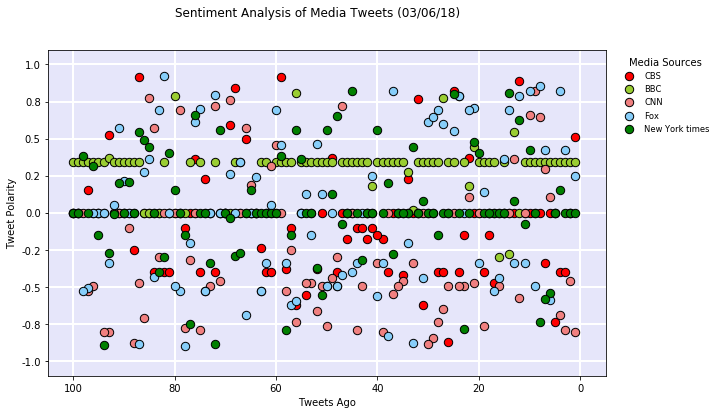

In [40]:
#Plotting Sentiments expressed  and saving into PNG images.

v_png_filename = 'sentimentsexpressed_'+today_str_plot+'.png'
v_title ="Sentiment Analysis of Media Tweets"+' '+today_str
v_x_label ="Tweets Ago"
v_y_label ="Tweet Polarity"

v_x_axis_series ="Tweets Ago"
v_y_axis_series  ="Tweet Polarity"

fig, ax1 = plt.subplots(figsize=(10, 6))

for my_graph_category in df_complete_agg['News Agency'].unique():
    df_scatter = df_complete_agg.loc[( df_complete_agg['News Agency'] == my_graph_category) ,:]
    x1, = df_scatter.plot(kind="scatter"
                          , x=v_x_axis_series
                          , y=v_y_axis_series
                          , label = my_graph_category
                          , color = News_color_dict[my_graph_category]
                          , marker ='o'
                          ,s = 70
                          , edgecolors="black"
                          , grid=True
                          ,subplots=True
                          , legend = True 
                          , ax=ax1 
                           )

lgnd = plt.legend(title ='Media Sources' 
                  , fontsize="small"
                  , fancybox=False
                  #,loc="best"
                  ,loc='upper right', bbox_to_anchor=(1.2, 1)
                  ,facecolor  = 'inherit'
                  , framealpha=1
                  ,edgecolor  = 'none'
                  ,numpoints =2
           )  
ax1.set_xlabel(v_x_label)
ax1.set_ylabel(v_y_label)
ax1.set_facecolor('#e6e6fa')
ax1.set_axisbelow(True)
ax1.grid(color='white', linewidth=2)
fig.suptitle(v_title)
ax1.set_xticks(range(0,101, 20)[::-1])
plt.xlim([-5, 105][::-1])
ax1.set_yticks(range(-1,1) , minor=True)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.ylim([-1.1, 1.1])
plt.savefig(v_png_filename)
plt.show()

In [41]:
# Aggregating data for Overall sentiments
agg_dict_x = { 'Tweet Polarity': ['mean']  }
df_group_type = df_complete_agg.groupby(['News Agency'])
df_complete_agg_level2 = df_group_type.agg(agg_dict_x)
df_complete_agg_level2.columns = ["_".join(x) for x in df_complete_agg_level2.columns.ravel()]

df_complete_agg_level2.reset_index(inplace=True)
df_complete_agg_level2.rename(columns={'Tweet Polarity_mean' : 'Tweet Polarity' },inplace=True)

df_complete_agg_level2

,News Agency,Tweet Polarity
0,BBC,0.272018
1,CBS,-0.045778
2,CNN,-0.192454
3,Fox,0.027692
4,New York times,0.028283


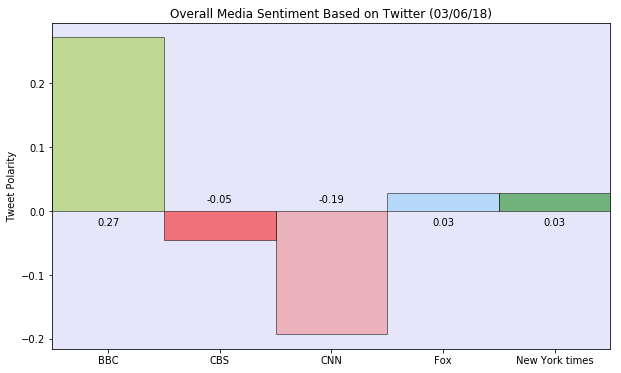

In [42]:
#Overall Sentiments and saving into PNG images.

v_png_filename = 'overall_sentiments_'+today_str_plot+'.png'
v_x_axis_series = df_complete_agg_level2['News Agency']
v_y_axis_series =  df_complete_agg_level2['Tweet Polarity'] 
v_title = 'Overall Media Sentiment Based on Twitter' +' '+today_str
v_y_label = 'Tweet Polarity'
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue",'green']
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.bar(v_x_axis_series
        , v_y_axis_series
        ,1
        , color=colors
        ,edgecolor ='Black'
        , alpha=0.5
        , align="center"
        #,linewidth=10
       )


ax1.set_facecolor('#e6e6fa')
plt.ylabel(v_y_label)
plt.title(v_title)
plt.xlim([-0.5,len(v_x_axis_series) - 0.5] )


cnt = 0
for x in v_y_axis_series:
    pct_text = "{0:.2f}".format(x)
    if x < 0 :
        v_verticalalignment='bottom'
        v_y_adustment = 0.01
    else :
        v_verticalalignment='top'
        v_y_adustment = -0.01
   
    plt.text(cnt, v_y_adustment ,pct_text, horizontalalignment='center',   verticalalignment=v_verticalalignment)
    cnt += 1
plt.savefig(v_png_filename)
plt.show()